# Reinforcement Learning - Homework 3
Ananya Gandhi, UNI: ag4348

## Written Project

### Question 1: Importance Sampling
1a) The integral can be expressed as:

$$ \begin{align}
\int_a^b f(x) dx &= \int_a^b f(x) \frac{p(x)}{p(x)} dx \\
&= \int_a^b \biggl[ \frac{f(x)}{p(x)} \biggr] p(x) dx \\
&= \mathbb{E}_p \biggl[\frac{f(x)}{p(x)} \biggr]
\end{align}
$$

where $p(x)$ is a generic probability distribution such that $p(x) \neq 0$ on the interval $[a, b]$. 

1b) Compute the integral of the function:
$$
f(x) = \biggl|\sin^5(\pi x) - 2\cos^3(3\cos^2(\frac{x}{\pi})))\biggr|
$$

using the uniform distribution and obtain 2 digits of accuracy. 

In [1]:
from scipy.stats.distributions import nakagami_gen
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

def importance_sampling(solution, f, accuracy, p, sample):
    estimates = []
    average = 0
    samples = 1
    
    while True:
        x_i = sample()
        z_i = f(x_i) / p(x_i)

        average += (z_i - average) / samples
        estimates.append(average)
        samples += 1

        if np.var(estimates) < 0.02 and samples >= 5:
            break
    
    return estimates

29702 Estimates Required for 0.01 accuracy
Final estimate: 12.170697998960637


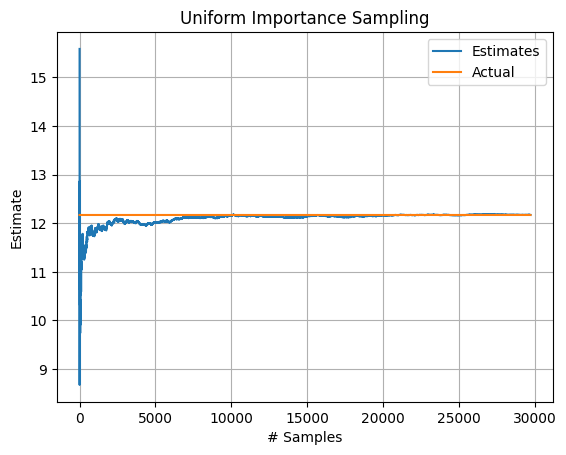

In [2]:
""" Sometimes takes a long time to run
"""

a = 0
b = 10
solution = 12.1687
accuracy = 1e-2  
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

uniform_pdf = lambda x: 1 / (b - a) if x <= b and x >= a else 0
uniform_samples = lambda : np.random.uniform(a, b)

estimates = importance_sampling(solution, f_x, accuracy, uniform_pdf, uniform_samples)
print(len(estimates), "Estimates Required for 0.01 accuracy")
print("Final estimate:", estimates[-1])

plt.plot(range(len(estimates)), estimates, label = "Estimates")
plt.plot(range(len(estimates)), [12.1687]*len(estimates), label = "Actual")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Uniform Importance Sampling")
plt.legend()
plt.grid()
plt.show()

In [3]:
""" We can also find the number of samples necessary by finding population 
    variance and computing the number N needed such that error <= 0.01
"""
N = 10000
x = uniform.rvs(a, b - a, size = N)
pdf = 1 / (b - a)

fx = f_x(x) / pdf
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2 
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

2526552 samples needed to ensure 0.01 accuracy


1c) Graph f(x) between 0 and 10, and find other probability distributions that achieve the same level of accuracy with fewer samples than the uniform distribution

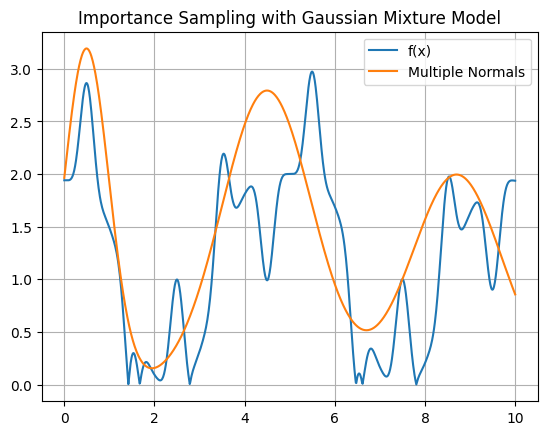

In [4]:
x = np.linspace(0, 10, 1000)
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

phi1 = 7*norm.pdf(x, 4.496, 1)
phi2 = 4*norm.pdf(x, 0.493, 0.5)
phi3 = 5*norm.pdf(x, 8.7, 1)

plt.plot(x, f_x(x), label="f(x)")
plt.plot(x, phi1 + phi2 + phi3, label="Multiple Normals")
plt.title("Importance Sampling with Gaussian Mixture Model")
plt.legend()
plt.grid()
plt.show()

In [5]:
accuracy = 1e-2  
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)
px_i = lambda x : 0.35*norm.pdf(x, 4.496, 1) + 0.35*norm.pdf(x, 0.493, 0.5) + 0.3*norm.pdf(x, 8.7, 1)


estimates = []
variances = []
average = 0
samples = 1
solution = 12.1687

while True:
    
    x_i = random.random()

    while True:  # sample from mixed normal
        
        if x_i <= 0.35:
            x_i = np.random.normal(4.496, 0.5)
        
        elif x_i <= 0.7:
            x_i = np.random.normal(0.493, 0.5)
        
        else:
            x_i = np.random.normal(8.7, 1)

        if x_i <= 10 and x_i >= 0:
            break
    
    z_i = f_x(x_i) / px_i(x_i) 

    average += (z_i - average) / samples

    estimates.append(average)
    samples += 1

    variances.append(np.var(estimates))

    if variances[-1] < 0.02 and samples >= 5:
        break

9128 Estimates Required
Last estimate: 12.171968712192541


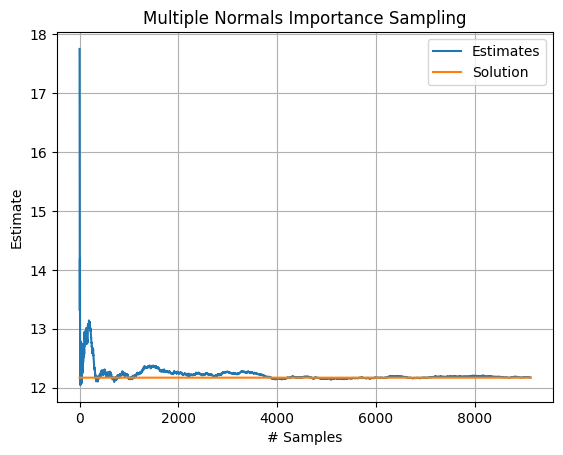

In [6]:
print(len(estimates), "Estimates Required")
print("Last estimate:", estimates[-1])
plt.plot(range(len(estimates)), estimates, label="Estimates")
plt.plot(range(len(estimates)), [solution]*len(estimates), label="Solution")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Multiple Normals Importance Sampling")
plt.grid()
plt.legend()
plt.show()

In [7]:
""" Similarly as with 1b, we can also find the number of samples necessary 
    using statistical methods
"""
N = 10000
x = []
pdf = lambda x : 0.35*norm.pdf(x, 4.496, 1) + 0.35*norm.pdf(x, 0.493, 0.5) + 0.3*norm.pdf(x, 8.7, 1)


for i in range(N):
    
    x_i = random.random()

    while True:  
        
        if x_i <= 0.35:
            x_i = np.random.normal(4.496, 0.5)
        
        elif x_i <= 0.7:
            x_i = np.random.normal(0.493, 0.5)
        
        else:
            x_i = np.random.normal(8.7, 1)

        if x_i <= 10 and x_i >= 0:
            x.append(x_i)
            break

x = np.array(x)
fx = f_x(x) / pdf(x)
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2 
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

1361560 samples needed to ensure 0.01 accuracy


1d) Repeat 1c with a mixture of beta distributions, scaled to interval [0, 10]. 

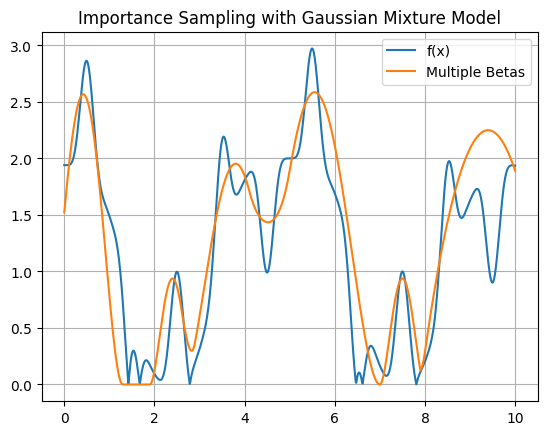

In [33]:
x = np.linspace(0, 10, 1000)
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

beta1 = 2.4*beta.pdf(x, 3.2, 3.1, -0.5, 1.8)
beta2 = 0.5*beta.pdf(x, 3, 3, 1.9, 1)
beta3 = 2.5*beta.pdf(x, 3, 3, 2.6, 2.4)
beta4 = 4*beta.pdf(x, 3, 3, 4.1, 2.9)
beta5 = 0.5*beta.pdf(x, 3, 3, 7, 1)
beta6 = 4.5*beta.pdf(x, 2, 2, 7.9, 3)

plt.plot(x, f_x(x), label="f(x)")
plt.plot(x, beta1 + beta2 + beta3 + beta4 + beta5 + beta6, label="Multiple Betas")
plt.title("Importance Sampling with Gaussian Mixture Model")
plt.legend()
plt.grid()
plt.show()

In [44]:
accuracy = 1e-2  
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)
px_i = lambda x : 0.2*beta.pdf(x, 3.2, 3.1, -0.5, 1.8) + 0.1*beta.pdf(x, 3, 3, 1.9, 1) + 0.2*beta.pdf(x, 3, 3, 2.6, 2.4) + 0.3*beta.pdf(x, 3, 3, 4.1, 2.8) + 0.2*beta.pdf(x, 2, 2, 6.75, 4)


estimates = []
variances = []
average = 0
samples = 1
solution = 12.1687

while True:
    
    x_i = random.random()

    while True:  # sample from mixed beta
        
        if x_i <= 0.3:
            x_i = beta.rvs(3, 3, 4.1, 2.8)
        
        elif x_i <= 0.5:
            x_i = beta.rvs(3.2, 3.1, -0.5, 1.8)
        
        elif x_i <= 0.7:
            x_i = beta.rvs(3, 3, 2.6, 2.4)

        elif x_i <= 0.9:
            x_i = beta.rvs(2, 2, 6.75, 4)
            
        else:
            x_i = beta.rvs(3, 3, 1.9, 1)
            

        if x_i <= 10 and x_i >= 0:
            break
    
    z_i = f_x(x_i) / px_i(x_i) 

    average += (z_i - average) / samples

    estimates.append(average)
    samples += 1

    variances.append(np.var(estimates))

    if variances[-1] < 0.02 and samples >= 5:
        break

32500 Estimates Required
Last estimate: 12.462346254972745


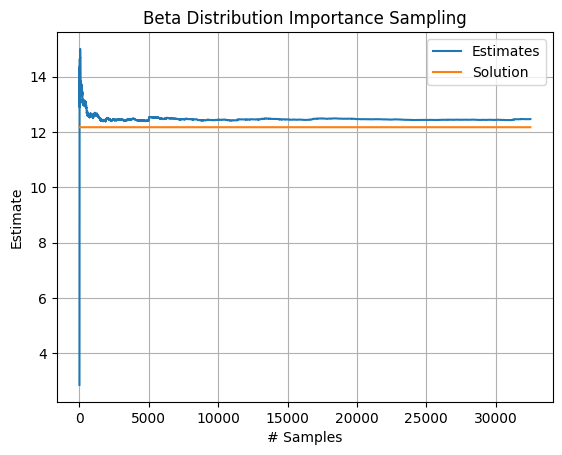

In [45]:
print(len(estimates), "Estimates Required")
print("Last estimate:", estimates[-1])
plt.plot(range(len(estimates)), estimates, label="Estimates")
plt.plot(range(len(estimates)), [solution]*len(estimates), label="Solution")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Beta Distribution Importance Sampling")
plt.grid()
plt.legend()
plt.show()

In [57]:
""" Similarly as with 1c, we can also find the number of samples necessary
    for beta distribution using statistical methods
"""
N = 10000
x = []
pdf = lambda x : 0.2*beta.pdf(x, 3.2, 3.1, -0.5, 1.8) + 0.1*beta.pdf(x, 3, 3, 1.9, 1) + 0.2*beta.pdf(x, 3, 3, 2.6, 2.4) + 0.3*beta.pdf(x, 3, 3, 4.1, 2.8) + 0.2*beta.pdf(x, 2, 2, 6.75, 4)


for i in range(N):
  
    x_i = random.random()

    while True:  
        
        if x_i <= 0.3:
            x_i = beta.rvs(3, 3, 4.1, 2.8)
        
        elif x_i <= 0.5:
            x_i = beta.rvs(3.2, 3.1, -0.5, 1.8)
        
        elif x_i <= 0.7:
            x_i = beta.rvs(3, 3, 2.6, 2.4)

        elif x_i <= 0.9:
            x_i = beta.rvs(2, 2, 6.75, 4)
            
        else:
            x_i = beta.rvs(3, 3, 1.9, 1)
            
        if x_i <= 10 and x_i >= 0:
            x.append(x_i)
            break

x = np.array(x)
fx = f_x(x) / pdf(x)
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2 
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

1828045 samples needed to ensure 0.01 accuracy


## Programming Project

In [58]:
# imports for project
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
import pandas as pd

### INTERACTIVE VERSION -- Question 2A

In [59]:
class Player:
    def __init__(self, turn, policy):
        self.turn = turn
        self.policy = policy

        if turn == 1:
            self.symbol = "X"
        else:
            self.symbol = "O"

In [60]:
class Player:
    def __init__(self, turn, policy):
        self.turn = turn
        self.policy = policy

        if turn == 1:
            self.symbol = "X"
        else:
            self.symbol = "O"

class TicTacToe:

    def __init__(self, mode="human", computer="random", players=None):
        self.board = np.array(["_"] * 9).reshape(3, 3)

        if players:
            self.player1 = players[0]
            self.player2 = players[1]

        if mode == "human":
            self.player1 = Player(turn=1, policy="human")
            self.player2 = Player(turn=2, policy="human")

        if mode == "human-computer":
            self.player1 = None
            self.player2 = None

        self.mode = mode  # change mode to play interactively
        self.computer = computer
        self.win = 1
        self.loss = -1
        self.discount = 1
        self.outcome = 0  # return 1 for player 1 win, -1 for player 1 loss, 0 for tie
        self.game_over = False

    def reset(self):
        self.board = np.array(["_"] * 9).reshape(3, 3)
        self.game_over = False
        self.outcome = 0

    def print_board(self):
        for i in range(len(self.board)):
            print(" ".join(self.board[i]))

    def play(self):
        if self.mode == "human":
            self.playhuman()

        elif self.mode == "human-computer":
            self.playcomputer()

        else:
            self.computervcomputer()

        return self.outcome

    def check_game(self):  # check all rows, columns, diagonals
        if np.all(self.board[0, :] == self.player1.symbol) or np.all(self.board[1, :] == self.player1.symbol) or np.all(self.board[2, :] == self.player1.symbol) or np.all(self.board[:, 0] == self.player1.symbol) or np.all(self.board[:, 1] == self.player1.symbol) or np.all(self.board[:, 2] == self.player1.symbol) or np.all(self.board.diagonal() == self.player1.symbol) or np.all(np.rot90(self.board).diagonal() == self.player1.symbol):
            self.game_over = True
            self.outcome = self.win

        elif np.all(self.board[0, :] == self.player2.symbol) or np.all(self.board[1, :] == self.player2.symbol) or np.all(self.board[2, :] == self.player2.symbol) or np.all(self.board[:, 0] == self.player2.symbol) or np.all(self.board[:, 1] == self.player2.symbol) or np.all(self.board[:, 2] == self.player2.symbol) or np.all(self.board.diagonal() == self.player2.symbol) or np.all(np.rot90(self.board).diagonal() == self.player2.symbol):
            self.game_over = True
            self.outcome = self.loss

        elif not np.any(self.board == "_"):
            self.game_over = True
            self.outcome = 0

        else:
            self.game_over = False
            return False

        return True

    def isvalid(self, move):
        if not move.isnumeric():
            return False

        move = int(move)
        if move < 0 or move > 8:
            return False

        elif self.board[move // 3, move % 3] != "_":
            return False

        return True

    def playhuman(self):
        print("Welcome! You are player X")
        print("In every round, please enter a number 0-8 to indicate your move.")
        print("Numbers 0-8 correspond to the following positions on the board:")
        print(np.arange(9).reshape(3, 3))

        while not self.game_over:
            if self.move(self.player1) or self.move(self.player2):
                self.print_board()
                if self.outcome == 1:
                    print("Player X wins!")

                elif self.outcome == -1:
                    print("Player O wins!")

                else:
                    print("It's a Tie!")

                break

    def playcomputer(self):
        print("Welcome to Tic Tac Toe!")
        print("Would you like to be player X or player O?")
        while not (symbol := input("Please enter 1 for X and 2 for O\n")) in ["1", "2"]:
            print("Enter a numeric value! Either 1 or 2")

        human = int(symbol)
        if human == 1:
            self.player1 = Player(turn=1, policy="human")
            self.player2 = Player(turn=2, policy=self.computer)

        else:
            self.player1 = Player(turn=2, policy="human")
            self.player2 = Player(turn=1, policy=self.computer)

        print("In every round, please enter a number 0-8 to indicate your move.")
        print("Numbers 0-8 correspond to the following positions on the board:")
        print(np.arange(9).reshape(3, 3))

        while not self.game_over:
            if self.player1.turn < self.player2.turn:
                if self.move(self.player1) or self.move(self.player2):
                    break

            else:
                if self.move(self.player2) or self.move(self.player1):
                    break
        
        self.print_board()
        if self.outcome == 1:
            print("Player X wins!")

        elif self.outcome == -1:
            print("Player O wins!")

        else:
            print("It's a Tie!")

    def computervcomputer(self):
        while not self.game_over:
            if self.player1.turn == 1:
                if self.move(self.player1) or self.move(self.player2):
                    break

            else:
                if self.move(self.player2) or self.move(self.player1):
                    break

    def move(self, player):
        if self.mode == "human":
            self.human_move(player)

        elif self.mode == "human-computer":
            if player.policy == "human":
                self.human_move(player)
            
            elif player.policy == "random":
                move = self.random_move()
                self.board[move[0], move[1]] = player.symbol
            
            else:
                move = self.defensive_move(player)
                self.board[move[0], move[1]] = player.symbol

        else:
            if player.policy == "random":
                move = self.random_move()

            else:
                move = self.defensive_move(player)

            self.board[move[0], move[1]] = player.symbol

        self.check_game()
        if self.game_over:
            return True

    def human_move(self, player):
        print("Player " + player.symbol + "'s Turn!")
        self.print_board()
        move = input("Make a move!\n")

        while not self.isvalid(move):
            move = input("Please enter a valid move 0-8 that is not already occupied.\n")

        move = int(move)
        self.board[move // 3, move % 3] = player.symbol

    def defensive_move(self, player):
        # use opponent's symbol to determine move
        symbol = "X" if player.symbol == "O" else "O"
        for i in range(len(self.board)):
            if np.count_nonzero(self.board[i, :] == symbol) == 2 and np.count_nonzero(self.board[i, :] == "_") == 1:
                move = (i, np.where(self.board[i, :] == "_"))
                return move

        else:
            for j in range(len(self.board[0])):
                if np.count_nonzero(self.board[:, j] == symbol) == 2 and np.count_nonzero(self.board[:, j] == "_") == 1:
                    move = (np.where(self.board[:, j] == "_"), j)
                    return move

            else:
                if np.count_nonzero(self.board.diagonal() == symbol) == 2 and np.count_nonzero(
                        self.board.diagonal() == "_") == 1:
                    move = (np.where(self.board.diagonal() == "_"), np.where(self.board.diagonal() == "_"))

                elif np.count_nonzero(np.rot90(self.board).diagonal() == symbol) == 2 and np.count_nonzero(
                        np.rot90(self.board).diagonal() == "_") == 1:
                    move = (2 - np.where(np.rot90(self.board).diagonal() == "_")[0],
                            np.where(np.rot90(self.board).diagonal() == "_")[0])

                else:
                    move = self.random_move()

                return move

    def random_move(self):
        possible_moves = np.transpose(np.where(self.board == "_"))
        return tuple(random.choice(possible_moves))

In [ ]:
# play interactive games, then simulate computer v. computer 5000 times

if __name__ == "__main__":

    # Game 1 -- human vs. human
    interactivegame = TicTacToe()
    interactivegame.play()

    # Game 2 -- human vs. computer (playing randomly)
    human_random = TicTacToe(mode="human-computer")
    human_random.play()

    # Game 3 -- human vs. computer (playing defensively)
    human_defensive = TicTacToe(mode="human-computer", computer="defensive")
    human_defensive.play()

    # Play random computer vs. defensive computer 5000 times
    random_wins = 0
    defensive_wins = 0
    ties = 0

    N = 5000
    for i in tqdm(range(N)):
        # uncomment to switch whether random or defensive player goes first
        """if random.random() < 0.5:
            player1 = Player(turn=1, policy="random")
            player2 = Player(turn=2, policy="defensive")
        else:
            player1 = Player(turn=2, policy="random")
            player2 = Player(turn=1, policy="defensive")"""
        
        player1 = Player(turn=1, policy="random")
        player2 = Player(turn=2, policy="defensive")

        game = TicTacToe(mode="simulation", players=[player1, player2])
        outcome = game.play()
        if outcome == 1:
            random_wins += 1
        elif outcome == 0:
            ties += 1
        else:
            defensive_wins += 1

        game.reset()

    print("RANDOM WINS ", random_wins)
    print("DEFENSIVE WINS ", defensive_wins)
    print("TIES ", ties)

    plt.bar(["Defensive Wins", "Ties", "Random Wins"], [defensive_wins/N, ties/N, random_wins/N])
    plt.title("Random vs. Defensive Policies")
    plt.ylabel("Percentage")
    plt.grid()
    plt.show()

### SIMULATION VERSION -- Question 2B
#### Monte Carlo First Visit

In [61]:
# Monte Carlo Methods (Monte Carlo First Visit - MCFV)
class TicTacToe:
    def __init__(self, player1, player2, discount = 1):
        self.board = np.array(['_'] * 9).reshape(3, 3)

        self.player1 = player1
        self.player2 = player2
        self.discount = discount

        self.win = 1
        self.loss = -1
        self.game_over = False
        self.player1outcome = 0
        self.player2outcome = 0

    def reset(self):
        self.board = np.array(["_"] * 9).reshape(3, 3)
        self.game_over = False
        self.player1outcome = 0
        self.player2outcome = 0

    def play(self):
        while not self.game_over:
            if self.player1.turn < self.player2.turn:
                if self.move(self.player1) or self.move(self.player2):
                    break

            else:
                if self.move(self.player2) or self.move(self.player1):
                    break

        return self.player1outcome, self.player2outcome

    def move(self, player):
        player.board = self.board  # update player board
        player_move = player.best_action()
        self.board[player_move // 3, player_move % 3] = player.symbol

        self.check_game()
        if self.game_over:
            self.player1.game_end(self.player1outcome)
            self.player2.game_end(self.player2outcome)
            return True

    def check_game(self):
        if np.all(self.board[0, :] == self.player1.symbol) or np.all(self.board[1, :] == self.player1.symbol) or np.all(
                self.board[2, :] == self.player1.symbol) or np.all(self.board[:, 0] == self.player1.symbol) or np.all(
                self.board[:, 1] == self.player1.symbol) or np.all(self.board[:, 2] == self.player1.symbol) or np.all(
                self.board.diagonal() == self.player1.symbol) or np.all(
                np.rot90(self.board).diagonal() == self.player1.symbol):
            self.game_over = True
            self.player1outcome = self.win
            self.player2outcome = self.loss

        elif np.all(self.board[0, :] == self.player2.symbol) or np.all(
                self.board[1, :] == self.player2.symbol) or np.all(self.board[2, :] == self.player2.symbol) or np.all(
                self.board[:, 0] == self.player2.symbol) or np.all(self.board[:, 1] == self.player2.symbol) or np.all(
                self.board[:, 2] == self.player2.symbol) or np.all(
                self.board.diagonal() == self.player2.symbol) or np.all(
                np.rot90(self.board).diagonal() == self.player2.symbol):
            self.game_over = True
            self.player1outcome = self.loss
            self.player2outcome = self.win

        elif not np.any(self.board == "_"):
            self.game_over = True

        else:
            self.game_over = False
            return False

        return True

In [62]:
class Player:
    def __init__(self, turn, policy):
        self.board = np.array(['_'] * 9).reshape(3, 3)
        self.turn = turn
        self.policy = policy  # store policy function as variable

        if turn == 1:
            self.symbol = "X"
        else:
            self.symbol = "O"

    def best_action(self):
        opponent_symbol = "O" if self.turn == 1 else "X"
        return self.policy(self.board, opponent_symbol)

    def game_end(self, outcome):
        pass


def random_policy(board, opponent_symbol):
    move = random.choice(np.transpose(np.where(board == "_")))
    return move[0]*3 + move[1]


def defensive_policy(board, opponent_symbol):
    for i in range(len(board)):
        if np.count_nonzero(board[i, :] == opponent_symbol) == 2 and np.count_nonzero(board[i, :] == "_") == 1:
            move = (i, np.where(board[i, :] == "_")[0])
            return move[0]*3 + move[1]

    else:
        for j in range(len(board[0])):
            if np.count_nonzero(board[:, j] == opponent_symbol) == 2 and np.count_nonzero(board[:, j] == "_") == 1:
                move = (np.where(board[:, j] == "_")[0], j)
                return move[0]*3 + move[1]

        else:
            if np.count_nonzero(board.diagonal() == opponent_symbol) == 2 and np.count_nonzero(
                    board.diagonal() == "_") == 1:
                move = (np.where(board.diagonal() == "_")[0], np.where(board.diagonal() == "_")[0])

            elif np.count_nonzero(np.rot90(board).diagonal() == opponent_symbol) == 2 and np.count_nonzero(
                    np.rot90(board).diagonal() == "_") == 1:
                move = (2 - np.where(np.rot90(board).diagonal() == "_")[0],
                        np.where(np.rot90(board).diagonal() == "_")[0])

            else:
                move = random_policy(board, opponent_symbol)
                return move

            return move[0]*3 + move[1]

In [63]:
class RLPlayer:
    def __init__(self, turn, states, epsilon = 0.01, discount=1, off_policy=False, simple_averages=False, use_off_policy=False):
        self.board = np.array(['_'] * 9).reshape(3, 3)
        self.turn = turn
        self.symbol = "X" if turn == 1 else "O"
        self.states = states
        self.epsilon = epsilon
        self.discount = discount
        self.move_sequence = []
        self.off_policy = off_policy
        self.simple_averages = simple_averages
        self.use_off_policy = use_off_policy

        # OFF POLICY INITIALIZATION of q, c, and pi tables
        if self.off_policy:
            self.q = {}
            self.c = {}
            
            for state in states:
                self.c[state] = {}
                self.q[state] = {}
                
                for action in self.possible_actions(state):
                    self.q[state][action] = random.random()
                    self.c[state][action] = 0

            self.pi = {}
            for state in states:
                if len(self.possible_actions(state)) > 0:
                    self.pi[state] = self.optimal(state)

        # REGULAR INIIALIZATION -- Monte Carlo First Visit
        else: 
            self.q = {}
            
            for state in states:
                self.q[state] = {}
                
                for action in self.possible_actions(state):
                    self.q[state][action] = random.random()

            # initialization step -- pi, q, returns
            self.pi = {}
            
            for state in states:
                self.pi[state] = {}

                possible_actions = self.possible_actions(state)
                action_size = len(possible_actions)
                
                if action_size == 0:
                    continue

                optimal = self.optimal(state)

                for action in possible_actions:
                    if action == optimal:
                        self.pi[state][action] = 1 - self.epsilon + self.epsilon/action_size

                    else:
                        self.pi[state][action] = self.epsilon / action_size

            self.returns = {}
            for state in states:
                self.returns[state] = {}

                for action in self.possible_actions(state):
                    self.returns[state][action] = []

    def reset(self):
        self.board = np.array(['_'] * 9).reshape(3, 3)
        self.symbol = "X" if self.turn == 1 else "O"
        self.move_sequence = []

    def complete_reset(self):
        self.reset()

        # reset q, pi, and results tables
        if self.off_policy:
            self.q = {}
            self.c = {}
            for state in self.states:
                self.c[state] = {}
                self.q[state] = {}
                for action in self.possible_actions(state):
                    self.q[state][action] = random.random()
                    self.c[state][action] = 0

            self.pi = {}
            for state in self.states:
                self.pi[state] = self.optimal(state)

        else:
            self.q = {}
            for state in self.states:
                self.q[state] = {}
                for i in range(9):
                    if state[i] == "_":
                        self.q[state][i] = random.random()

            self.pi = {}
            for state in self.states:
                self.pi[state] = {}

                possible_actions = self.possible_actions(state)
                action_size = len(possible_actions)
                if action_size == 0:
                    continue

                optimal = self.optimal(state)
                for action in possible_actions:
                    if action == optimal:
                        self.pi[state][action] = 1 - self.epsilon + self.epsilon / action_size

                    else:
                        self.pi[state][action] = self.epsilon / action_size

            self.returns = {}
            for state in self.states:
                self.returns[state] = {}

                for action in self.possible_actions(state):
                    self.returns[state][action] = []

    def board_to_state(self, state):
        return tuple(state.flatten())

    def possible_actions(self, state):
        return [i for i,x  in enumerate(state) if x == "_"]

    def optimal(self, state):
        optimal = []
        best_value = -np.Inf
        possible_actions = self.possible_actions(state)

        for action_num in possible_actions:
            value = self.discount * self.q[state][action_num]

            if value > best_value:
                best_value = value
                optimal = [action_num]

            elif value == best_value:
                optimal.append(action_num)

        optimal = random.choice(optimal)
        return optimal

    def best_action(self):
        idx = self.board_to_state(self.board)
        best_action = self.optimal(idx)

        if self.off_policy:
            best_action = random.choice([x for x,y in enumerate(idx) if y == "_"])

        sar = [idx, best_action, 0]
        self.move_sequence.append(tuple(sar))
        return best_action

    def game_end(self, outcome):
        # alter last element of move sequence to take into account game outcome
        last_element = self.move_sequence[-1]
        new_outcome = list(last_element)
        new_outcome[-1] = outcome
        self.move_sequence[-1] = tuple(new_outcome)

        if self.off_policy:
            G = 0
            W = 1
            t = len(self.move_sequence) - 1
            rho = 1

            while t >= 0:
                sar = self.move_sequence[t]
                state, action, reward = sar[0], sar[1], sar[2]
                G += self.discount * reward
                action_size = len(self.possible_actions(state))
                b_probability = (1 / action_size)

                if self.simple_averages:  # weight all timesteps equally
                    W = 1
                    self.c[state][action] += W

                    if action == self.pi[state]:
                        pi = 1
                        if t < len(self.move_sequence) - 1:
                            rho *= pi / b_probability
                            self.q[state][action] += (rho * G - self.q[state][action]) / self.c[state][action]

                else:
                    self.c[state][action] += W
                    self.q[state][action] += (W / self.c[state][action]) * (G - self.q[state][action])

                    W *= 1 / b_probability  # update W, probability b(A_t | S_t) = uniform, 1/size(A_t)

                self.pi[state] = self.optimal(state)

                if action != self.pi[state]:
                    break

                t -= 1

        # if using the off-policy method, use existing q tables while using policy but without updating
        elif self.use_off_policy:
            pass
        
        else:
            G = 0
            t = len(self.move_sequence) - 1

            while t >= 0:
                sar = self.move_sequence[t]
                G += self.discount * sar[-1]
                self.returns[sar[0]][sar[1]].append(G)
                self.q[sar[0]][sar[1]] = np.average(self.returns[sar[0]][sar[1]])

                possible_actions = self.possible_actions(sar[0])
                action_size = len(possible_actions)
                best_action = self.optimal(sar[0])

                for action in possible_actions:
                    if action == best_action:
                        self.pi[sar[0]][action] = 1 - self.epsilon + self.epsilon / action_size
                    else:
                        self.pi[sar[0]][action] = self.epsilon / action_size

                t -= 1

        self.reset()

In [64]:
def play_ngames(n, player1, player2):
    outcomes = []

    for i in tqdm(range(n)):
        game = TicTacToe(player1, player2)
        out, _ = game.play()
        outcomes.append(out)
        game.reset()

    return outcomes

100%|██████████| 5000/5000 [00:09<00:00, 535.23it/s]


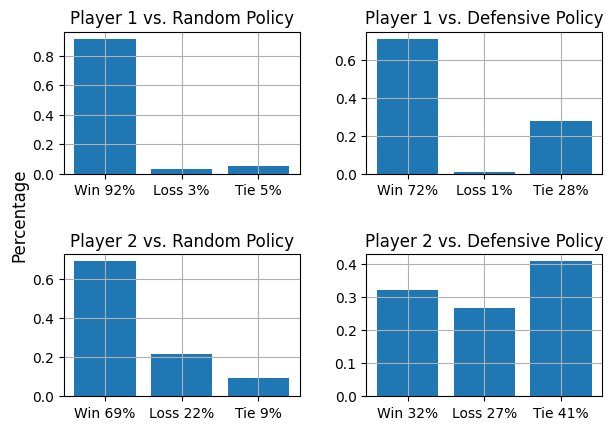

100%|██████████| 5000/5000 [00:14<00:00, 340.55it/s]


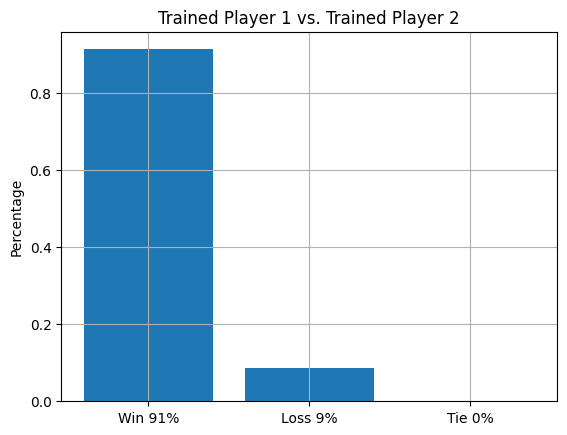

In [65]:
N = 5000

symbols = [["X", "O", "_"]] * 9
states = set(product(*symbols))

mcfv1vrandom = RLPlayer(turn=1, states=states)
mcfv1vdefensive = RLPlayer(turn=1, states=states)
mcfv2vrandom = RLPlayer(turn=2, states=states)
mcfv2vdefensive = RLPlayer(turn=2, states=states)
RLplayers = [[mcfv1vrandom, mcfv1vdefensive], [mcfv2vrandom, mcfv2vdefensive]]

random1 = Player(turn=2, policy=random_policy)
random2 = Player(turn=1, policy=random_policy)
defensive1 = Player(turn=2, policy=defensive_policy)
defensive2 = Player(turn=1, policy=defensive_policy)
opponents = [[random1, defensive1], [random2, defensive2]]

fig, axes = plt.subplots(2, 2)

for i in range(len(RLplayers)):
    for j in range(len(RLplayers)):
        if j % 2 == 0:
            policy = "Random"

        else:
            policy = "Defensive"

        outcomes = play_ngames(N, RLplayers[i][j], opponents[i][j])
        outcomes = [outcomes.count(1) / N, outcomes.count(-1) / N, outcomes.count(0) / N]
        axes[i, j].bar(
            ["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
            outcomes)
        axes[i, j].set_title("Player " + str(i + 1) + " vs. " + policy + " Policy")
        axes[i, j].grid()

fig.tight_layout(pad=2.5)
fig.supylabel("Percentage")
plt.show()

""" Now, play agent trained against Random with agent trained against Defensive
"""

trained_vs_trained = []

for i in tqdm(range(N)):
    if random.random() < 0.5:  # half the time, random goes first
        game = TicTacToe(mcfv1vrandom, mcfv2vdefensive)

    else:  # the other half, defensive goes first
        game = TicTacToe(mcfv1vdefensive, mcfv2vrandom)

    out, _ = game.play()
    trained_vs_trained.append(out)
    game.reset()

outcomes = [trained_vs_trained.count(1) / N, trained_vs_trained.count(-1) / N, trained_vs_trained.count(0) / N]
plt.bar(["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
        outcomes)
plt.title("Trained Player 1 vs. Trained Player 2")
plt.ylabel("Percentage")
plt.grid()
plt.show()

### SIMULATION VERSION -- Question 2C
#### Monte Carlo Off Policy

For the off-policy Monte Carlo methods with Importance Sampling, we use a behavior policy (random) in order to explore while learning the optimal policy. 

Under off-policy methods involving importance sampling, we find the value of a state as follows:

$$ V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t) - 1} G_t}{|\mathcal{T}(s)|}
$$

This formula can be simplified, however, because within a game (episode), the same states are not visited multiple times. Each state is visited only once, at a fixed time, so we have:

$$ V(s) = \rho_{t:T(t) - 1} G_t
$$

Now, we can use our definition for the importance sampling ratio $\rho$:

$$
\rho_{t:T(t) - 1} = \prod_{k = t}^{T - 1} \frac{\pi(A_k | S_k)}{b(A_k | S_k)} \\
V(s) = G_t \prod_{k = t}^{T - 1} \frac{\pi(A_k | S_k)}{b(A_k | S_k)}
$$

Now, we can simply update our state-action values using the returns, scaled by the importance sampling ratio $\rho$

In our implementation, $b$ is a behavior policy that selects randomly from available actions at the current state:
$$
b(A_k | S_k) = \frac{1}{|A(S_k)|} 
$$
where $|A(S_k)|$ is the size of the set of available actions at state $S_k$.

Also, in our implementation, we are searching for a deterministic greedy policy $\pi$. This policy works as follows:

$$ \pi(A_k | S_k) = \begin{cases} 1 & \text{ if } A_k = A^* \\ 
0 & \text{ otherwise } \\ 
\end{cases}
$$

100%|██████████| 5000/5000 [00:08<00:00, 567.61it/s]


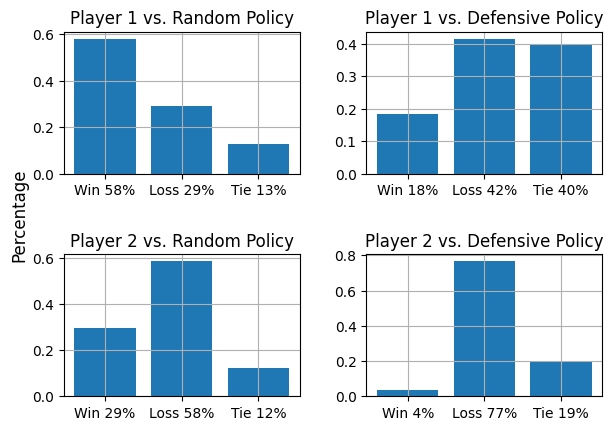

100%|██████████| 5000/5000 [00:04<00:00, 1018.03it/s]


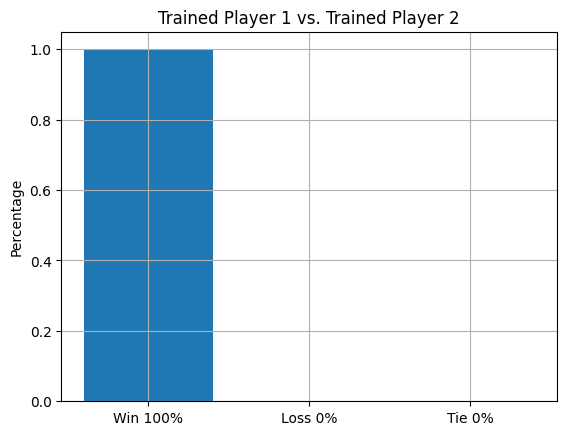

In [66]:
""" NOTE: must run code from 2B in order for code for 2C to compile
    2C code and implementation is within 2B implementation, but plots 
    and performance is below: 
"""

# Off Policy Monte Carlo Methods with Simple Averages (OPMC)

if __name__ == "__main__":
    N = 5000
    symbols = [["X", "O", "_"]] * 9
    states = set(product(*symbols))

    opmc1vrandom = RLPlayer(turn=1, states=states, off_policy=True, simple_averages=True)
    opmc1vdefensive = RLPlayer(turn=1, states=states, off_policy=True, simple_averages=True)
    opmc2vrandom = RLPlayer(turn=2, states=states, off_policy=True, simple_averages=True)
    opmc2vdefensive = RLPlayer(turn=2, states=states, off_policy=True, simple_averages=True)
    RLplayers = [[opmc1vrandom, opmc1vdefensive], [opmc2vrandom, opmc2vdefensive]]

    random1 = Player(turn=2, policy=random_policy)
    defensive1 = Player(turn=2, policy=defensive_policy)
    random2 = Player(turn=1, policy=random_policy)
    defensive2 = Player(turn=1, policy=defensive_policy)
    opponents = [[random1, defensive1], [random2, defensive2]]

    fig, axes = plt.subplots(2, 2)

    for i in range(len(RLplayers)):
        for j in range(len(RLplayers)):
            if j % 2 == 0:
                policy = "Random"

            else:
                policy = "Defensive"

            outcomes = play_ngames(N, RLplayers[i][j], opponents[i][j])
            outcomes = [outcomes.count(1) / N, outcomes.count(-1) / N, outcomes.count(0) / N]
            axes[i, j].bar(
                ["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
                outcomes)
            axes[i, j].set_title("Player " + str(i + 1) + " vs. " + policy + " Policy")
            axes[i, j].grid()

    fig.tight_layout(pad=2.5)
    fig.supylabel("Percentage")
    plt.show()

    trained_vs_trained = []
    opmc1vrandom.off_policy, opmc1vdefensive.off_policy, opmc2vrandom.off_policy, opmc2vdefensive.off_policy = False, False, False, False
    opmc1vrandom.use_off_policy, opmc1vdefensive.use_off_policy, opmc2vrandom.use_off_policy, opmc2vdefensive.use_off_policy = True, True, True, True

    for i in tqdm(range(N)):
        if random.random() < 0.5:  # half the time, random goes first
            game = TicTacToe(opmc1vrandom, opmc2vdefensive)

        else:  # the other half, defensive goes first
            game = TicTacToe(opmc1vdefensive, opmc2vrandom)

        out, _ = game.play()
        trained_vs_trained.append(out)
        game.reset()

    outcomes = [trained_vs_trained.count(1) / N, trained_vs_trained.count(-1) / N, trained_vs_trained.count(0) / N]
    plt.bar(["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
            outcomes)
    plt.title("Trained Player 1 vs. Trained Player 2")
    plt.ylabel("Percentage")
    plt.grid()
    plt.show()

100%|██████████| 5000/5000 [00:13<00:00, 382.84it/s]


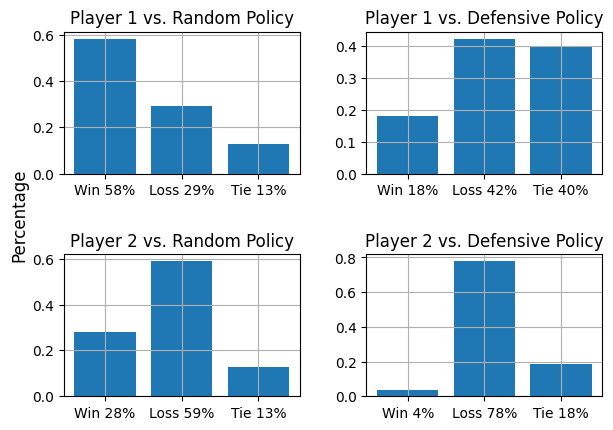

100%|██████████| 5000/5000 [00:05<00:00, 897.14it/s]


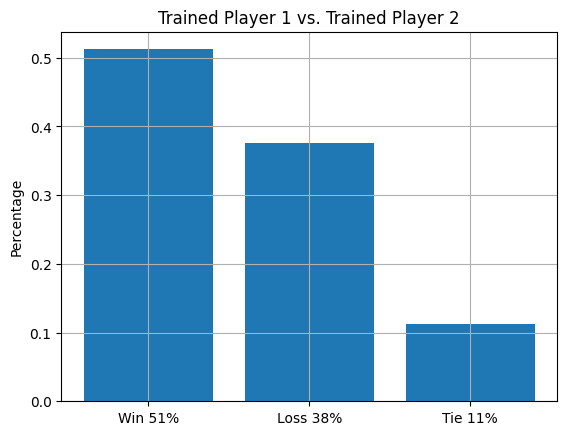

In [67]:
# Off Policy Monte Carlo Methods with Weighted Averages (OPMC)

if __name__ == "__main__":
    N = 5000
    symbols = [["X", "O", "_"]] * 9
    states = set(product(*symbols))

    player1vrandom = RLPlayer(turn=1, states=states, off_policy=True, simple_averages=False)
    player1vdefensive = RLPlayer(turn=1, states=states, off_policy=True, simple_averages=False)
    player2vrandom = RLPlayer(turn=2, states=states, off_policy=True, simple_averages=False)
    player2vdefensive = RLPlayer(turn=2, states=states, off_policy=True, simple_averages=False)
    RLplayers = [[player1vrandom, player1vdefensive], [player2vrandom, player2vdefensive]]

    random1 = Player(turn=2, policy=random_policy)
    defensive1 = Player(turn=2, policy=defensive_policy)
    random2 = Player(turn=1, policy=random_policy)
    defensive2 = Player(turn=1, policy=defensive_policy)
    opponents = [[random1, defensive1], [random2, defensive2]]

    fig, axes = plt.subplots(2, 2)

    for i in range(len(RLplayers)):
        for j in range(len(RLplayers)):
            if j % 2 == 0:
                policy = "Random"

            else:
                policy = "Defensive"

            outcomes = play_ngames(N, RLplayers[i][j], opponents[i][j])
            outcomes = [outcomes.count(1) / N, outcomes.count(-1) / N, outcomes.count(0) / N]
            axes[i, j].bar(
                ["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
                outcomes)
            axes[i, j].set_title("Player " + str(i + 1) + " vs. " + policy + " Policy")
            axes[i, j].grid()

    fig.tight_layout(pad=2.5)
    fig.supylabel("Percentage")
    plt.show()

    trained_vs_trained = []
    player1vrandom.off_policy, player1vdefensive.off_policy, player2vrandom.off_policy, player2vdefensive.off_policy = False, False, False, False
    player1vrandom.use_off_policy, player1vdefensive.use_off_policy, player2vrandom.use_off_policy, player2vdefensive.use_off_policy = True, True, True, True

    for i in tqdm(range(N)):
        if random.random() < 0.5:  # half the time, random goes first
            game = TicTacToe(player1vrandom, player2vdefensive)

        else:  # the other half, defensive goes first
            game = TicTacToe(player1vdefensive, player2vrandom)

        out, _ = game.play()
        trained_vs_trained.append(out)
        game.reset()

    outcomes = [trained_vs_trained.count(1) / N, trained_vs_trained.count(-1) / N, trained_vs_trained.count(0) / N]
    plt.bar(["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])],
            outcomes)
    plt.title("Trained Player 1 vs. Trained Player 2")
    plt.ylabel("Percentage")
    plt.grid()
    plt.show()

### SIMULATION VERSION -- Question 2d

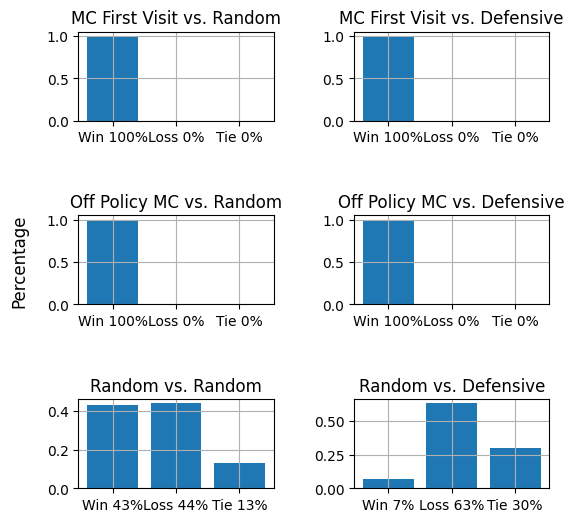

In [68]:
players_1 = [[mcfv1vrandom, opmc1vrandom, random1], [mcfv1vdefensive, opmc1vdefensive, random1]]
players_2 = [[mcfv2vrandom, opmc2vrandom, random2], [mcfv2vdefensive, opmc2vdefensive, random2]]
opponents_1 = [random1, defensive1]
opponents_2 = [random2, defensive2]
player_labels = ["MC First Visit", "Off Policy MC", "Random"]
opponent_labels = ["Random", "Defensive"]

N = 100
fig, axes = plt.subplots(3, 2)
fig.set_figheight(6)
fig.set_figwidth(6)

for i in range(len(opponents_1)):
    for j in range(len(players_1[0])):
        outcomes = []
        for k in range(100):
            if k < 50:
                p1 = players_1[i][j]
                p2 = opponents_2[i]
            
            else:
                p1 = players_2[i][j]
                p2 = opponents_1[i]
            
            game = TicTacToe(p1, p2)
            out, _ = game.play()
            outcomes.append(out)
            game.reset()
        
        
        outcomes = [outcomes.count(1) / N, outcomes.count(-1) / N, outcomes.count(0) / N]
        axes[j, i].bar(["Win {:.0%}".format(outcomes[0]), "Loss {:.0%}".format(outcomes[1]), "Tie {:.0%}".format(outcomes[2])], outcomes)
        axes[j, i].set_title(player_labels[j] +  " vs. " + opponent_labels[i])
        axes[j, i].grid()

fig.tight_layout(pad=3.5)
fig.supylabel("Percentage")
plt.show()